In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score 

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5
pd.options.display.float_format = '{:,.1f}'.format

from eli5.formatters import format_as_dataframe

In [35]:
data2 = pd.read_csv('thesis_data.csv', sep=';')
data2.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,gdp_o,gdp_d,rta,HHI_value,tr_flows,MS
0,2007,ALB,AUT,0,"812,933",0,"10701011,968","386439118,848",1,"0,34",38736,"0,00000879375034955022"
1,2007,ALB,DEU,0,"1493,096",0,"10701011,968","3435506696,192",1,"0,34",1000,"0,0000000258199272828224"
2,2007,ALB,GRC,1,"500,124",0,"10701011,968","318668275,712",1,"0,34",11904,"0,00000269812421107873"
3,2007,ALB,ITA,0,"611,763",0,"10701011,968","2203972534,272",1,"0,34",7921,"0,000000514351151477611"
4,2007,DZA,CAN,0,"6747,007",1,"134977871,872","1457872830,464",0,"0,14",1830,"0,000000180775516808116"


In [36]:
data['dist'] = data['dist'].apply(lambda row: row.replace(',','.') if (',' in row) else row)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48505 entries, 0 to 48504
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         48505 non-null  int64 
 1   iso3_o       48505 non-null  object
 2   iso3_d       48505 non-null  object
 3   contig       48505 non-null  int64 
 4   dist         48505 non-null  object
 5   comlang_off  48505 non-null  int64 
 6   gdp_o        48505 non-null  object
 7   gdp_d        48505 non-null  object
 8   rta          48505 non-null  int64 
 9   HHI_value    48505 non-null  object
 10  tr_flows     48505 non-null  object
 11  MS           48505 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.4+ MB


In [2]:
data = pd.read_csv('data2801.csv',sep=';')

In [3]:
data.head()

,X.1,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
0,0,7,2007,ALB,AUT,0,"812,933",0,"0,001","10701011,968",...,1,1,5,8,40,4404946520,"0,34",38736,"0,00000879375034955022","-0,0000119595004753883"
1,4,11,2007,ALB,DEU,0,"1493,096",0,0,"10701011,968",...,1,1,5,8,276,38729776000,"0,34",1000,"0,0000000258199272828224","-0,0000000351151011046385"
2,5,12,2007,ALB,GRC,1,"500,124",0,"0,003","10701011,968",...,1,1,5,8,300,4411954035,"0,34",11904,"0,00000269812421107873","-0,00000366944892706708"
3,7,14,2007,ALB,ITA,0,"611,763",0,0,"10701011,968",...,1,1,5,8,381,15399984966,"0,34",7921,"0,000000514351151477611","-0,000000699517566009551"
4,11,19,2007,DZA,CAN,0,"6747,007",1,"0,008","134977871,872",...,0,0,6,12,124,10123052238,"0,14",1830,"0,000000180775516808116","-0,000000101234289412545"


## New regression formula to test

reg4 <- lm(log(tr_flows) ~ log(dist) +
             dummy(rta) +
             dummy(contig) +
             dummy(comlang_off) +
             + dummy(year)+ dummy(iso3_o) + dummy(iso3_d), data = dat)

In [4]:
data = data[['dist','tr_flows','rta','contig','year','comlang_off','iso3_o','iso3_d']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48505 entries, 0 to 48504
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dist         48505 non-null  object
 1   tr_flows     48505 non-null  object
 2   rta          48505 non-null  int64 
 3   contig       48505 non-null  int64 
 4   year         48505 non-null  int64 
 5   comlang_off  48505 non-null  int64 
 6   iso3_o       48505 non-null  object
 7   iso3_d       48505 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.0+ MB


In [6]:
data[data['tr_flows'] == '27,9999999999999']

,dist,tr_flows,rta,contig,year,comlang_off,iso3_o,iso3_d
1823,"7864,644","27,9999999999999",0,0,2007,0,HKG,EST


In [7]:
#lambda <arguments> : <Return Value if condition is True> if <condition> else <Return Value if condition is False>
#lambda x : True if (x > 10 and x < 20) else False

In [8]:
data[data['tr_flows'].apply(lambda x: ',99999' in x)]['tr_flows']

1823     27,9999999999999
9113     49,9999999999999
10819    20,9999999999999
15343    41,9999999999999
15387    82,9999999999999
26358    55,9999999999999
27694    28,9999999999999
28954    28,9999999999999
30430    54,9999999999999
32492    99,9999999999999
32556    68,9999999999999
40444    55,9999999999999
Name: tr_flows, dtype: object

In [9]:
data['tr_flows'] = data['tr_flows'].apply(lambda row: int(row.split(',')[0])+1 if (',99999' in row) else int(row))

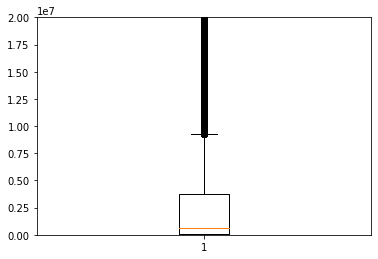

In [10]:
plt.ylim(0,20000000)
plt.boxplot(data['tr_flows'])
plt.show()

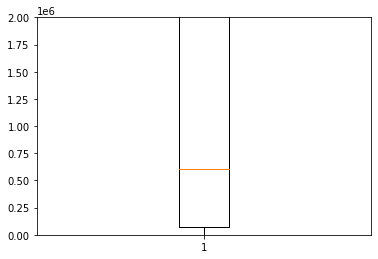

In [11]:
plt.ylim(0,2000000)
plt.boxplot(data['tr_flows'])
plt.show()

In [12]:
data['dist'] = data['dist'].apply(lambda row: row.replace(',','.') if (',' in row) else row)

In [13]:
data['dist'] = pd.to_numeric(data['dist'], downcast="float")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48505 entries, 0 to 48504
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dist         48505 non-null  float32
 1   tr_flows     48505 non-null  int64  
 2   rta          48505 non-null  int64  
 3   contig       48505 non-null  int64  
 4   year         48505 non-null  int64  
 5   comlang_off  48505 non-null  int64  
 6   iso3_o       48505 non-null  object 
 7   iso3_d       48505 non-null  object 
dtypes: float32(1), int64(5), object(2)
memory usage: 2.8+ MB


In [15]:
data_log = data[['rta','contig','year','comlang_off','iso3_o','iso3_d']]
data_log['tr_flows_log'] = np.log(data['tr_flows'])
data_log['dist_log'] = np.log(data['dist'])

<ipython-input-15-7101813f6477>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_log['tr_flows_log'] = np.log(data['tr_flows'])


In [16]:
data_log_origin = data_log.copy(deep=True)

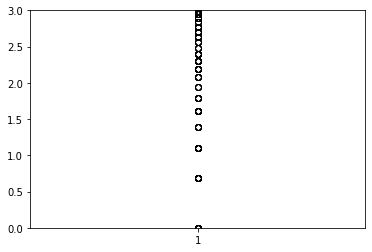

In [17]:
plt.ylim(0,3)
plt.boxplot(data_log['tr_flows_log'])
plt.show()

In [18]:
numeric = ['tr_flows_log','dist_log']

In [19]:
scaler = StandardScaler()
scaler.fit(data_log[numeric])
data_log[numeric] = scaler.transform(data_log[numeric])

In [20]:
data_log_transformed = pd.get_dummies(data_log, drop_first=True)

In [21]:
features = data_log_transformed.drop(['tr_flows_log'], axis=1)
target = data_log_transformed['tr_flows_log']

In [22]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [23]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)
print('predicted mean: ', predicted_valid.mean())

model MAE:  0.5379939804428059
model RMSE:  0.5178244828669204
predicted mean:  0.002678086490077538


In [24]:
feature_names = [col for col in list(features.columns)]

In [25]:
weights = eli5.explain_weights(model,top = 300, feature_names = feature_names, target_names = ['tr_flows_log'])

In [26]:

weights = format_as_dataframe(weights)

In [27]:
weights

,target,feature,weight
0,tr_flows_log,iso3_o_USA,4.1
1,tr_flows_log,iso3_o_IND,4.1
2,tr_flows_log,iso3_o_CHN,4.0
3,tr_flows_log,iso3_o_DEU,4.0
4,tr_flows_log,iso3_o_FRA,3.9
...,...,...,...
286,tr_flows_log,iso3_d_FSM,-1.2
287,tr_flows_log,iso3_d_KNA,-1.2
288,tr_flows_log,iso3_d_AND,-1.2
289,tr_flows_log,iso3_d_GRL,-1.8


Saving weights

In [28]:
weights.to_csv('model_4_weights.csv')